In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import glob
import gzip
import scipy

In [2]:

workstation=0  #[0=local/github, 162,163]
year=2018

imagedir = 'JD-2018data/image-output/'

if workstation==162:
    %cd '/home/jdavidson/bees_sharedcodes/Bees_sharedcodes/'
elif workstation==163:
    %cd '/sharedcodes/bees/code/'    
else:
    None # for github/local, working directory is this one

import definitions_2018 as bd
if workstation==162:
    resultsdir = '/home/jdavidson/bees_data/beeresults/'
    comb_contents_dir = '/home/jdavidson/bees_data/comb-contents-images/'
elif workstation==163:
    resultsdir = '/data/beeresults/'
    comb_contents_dir = '/data/comb-contents-images/'
elif workstation==0:
    resultsdir = 'data2018/'
    comb_contents_dir = 'comb-contents2018/'     
zfilln = 2 # for file names
    
import displayfunctions as bp  # 'bee plots'
import datafunctions as dfunc
dfunc.init(bd) 
bp.init(bd)
bd.year

/mnt/storage/Seafile/Bees_sharedcodes/JD-2018-Github/definitions_2018.py:20: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  cohort_birthdates = np.array([pd.Timestamp(np.array(cohort_data['DOB'][cohort_data['cohort']==c])[0],freq='D') for c in cohort_colornames])


2018

# Fig 1 example with three bees  

In [3]:
daynum=26
comb = pickle.load(gzip.open(comb_contents_dir+'comb_'+str(daynum).zfill(zfilln)+'.pklz','rb'))

In [4]:
savefile = resultsdir+'beetrajectories_026_hour14_for_Fig1.hdf'
df = pd.read_hdf(savefile)
day_uids = np.unique(df['uid']).astype(int).copy()  # this includes only bees that were alive this day - see '2019 - DBquery'    
day = bd.alldaytimestamps[daynum]
print(day)

2018-08-11 00:00:00


In [5]:
day_ages = np.concatenate(dfunc.getages(daynum))

In [6]:
np.unique(day_ages)[0:-1]

array([-1.,  0.,  6., 11., 16., 21., 26., 31., 36., 40., 46., 51., 56.])

In [8]:
dancefloorcomb,hull = pickle.load(gzip.open('combined_dancefloor.pklz','rb'))  
hull_vertices = [hull.points[hull.vertices,0],hull.points[hull.vertices,1]]


In [9]:
# get certain times and certain bees
starthour = 14
numhours = 1
startframe = dfunc.assign_integer_framenums_hourminsec(starthour,0,0)
endframe = dfunc.assign_integer_framenums_hourminsec(starthour+numhours,0,0)
timesel = (df['framenum']>=startframe) & (df['framenum']<endframe)
dfsel = df[timesel].copy()



### Find good bees to show

In [ ]:
# # find a good one

# # get bees of different ages
# ages_to_show = [6,16,26]
# uids_diff_ages = [np.where(day_ages==a)[0] for a in ages_to_show]

# beedfs_all = []
# for uids in uids_diff_ages:
#     beedfs = []
#     for uid in uids:
# #         print(uid)
#         beedfs.append(dfsel[(dfsel['uid']==uid)])
#     beedfs_all.append(beedfs)

In [ ]:
# # display
# agenum=2
# for i,beedf in enumerate(beedfs_all[agenum]):
#     if len(beedf)>50:
#         ax = bp.showframe()
#         ax.plot(bd.xpixels+hull_vertices[1], hull_vertices[0], linestyle='--',lw=4,c=bd.cmap_comb(5))
#         bp.plotbee_xy(beedf['x'], beedf['y'], beedf['camera'], ax=ax, s=30, alpha=1, color='k',joined=True)
#         plt.title('Age '+str(ages_to_show[agenum])+': '+str(i)+'UID: '+str(beedf['uid'].iloc[0]),fontsize=25)
#         plt.show()

### Choose these bees and plot

In [10]:
# young:  3027,3024, 2881
uids_best = [2881,2394,1600]

In [11]:

beedfs_to_show = []
for uid in uids_best:
    print(uid)
    beedfs_to_show.append(dfsel[(dfsel['uid']==uid)])

2881
2394
1600


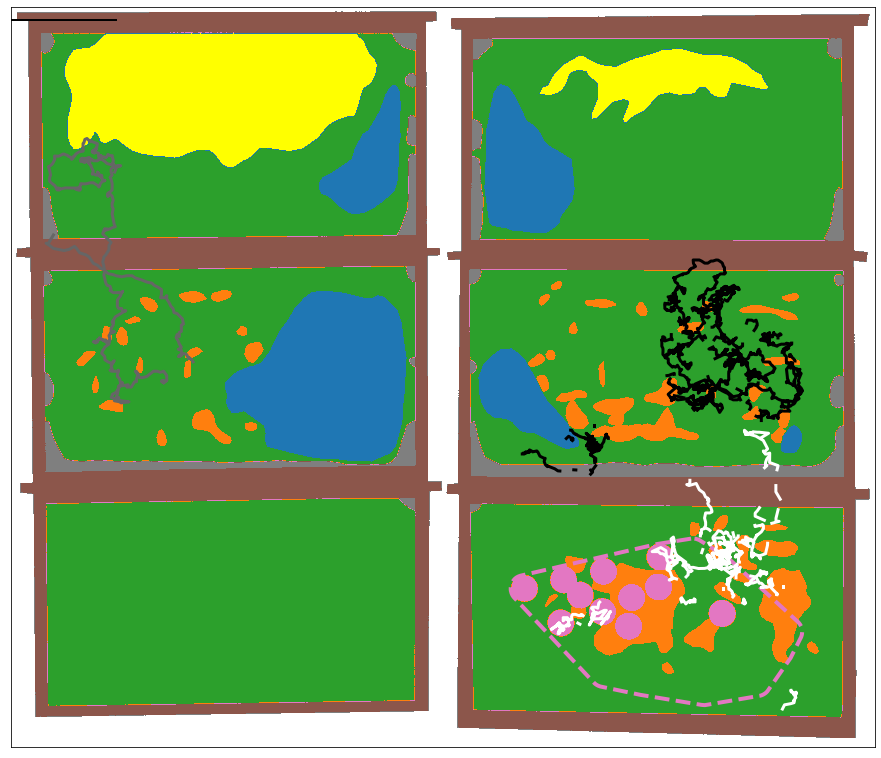

In [13]:
ax = bp.showcomb(comb, alphamult=1)
# bp.showframe()
ax.plot(bd.xpixels+hull_vertices[1], hull_vertices[0], linestyle='--',lw=4,c=bd.cmap_comb(5))
greycolors = [[0,0,0],[0.4, 0.4, 0.4],[1,1,1]]

for i,beedf in enumerate(beedfs_to_show):
#         ax.plot(bd.xpixels+hull_vertices[1], hull_vertices[0], linestyle='--',lw=4,c=bd.cmap_comb(5))
        bp.plotbee_xy(beedf['x'], beedf['y'], beedf['camera'], ax=ax, s=30, alpha=1, color=greycolors[i],joined=True)
linelength=10 # in cm
ax.plot([0,0+linelength*bd.pixels_per_cm],[100,100],linewidth=2,color='k')
# plt.savefig(imagedir+'nest_example_Fig1.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
print('ages of example bees:',day_ages[uids_best])

ages of example bees: [ 6. 16. 26.]
